In [1]:
import setGPU

import tensorflow as tf

import os
import zipfile
import urllib
import matplotlib.pyplot as plt

setGPU: Setting GPU to: 0


/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3

In [2]:
urllib.request.urlretrieve("https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip",
                           filename="../../../../data/publicDataset/happy-or-sad.zip")

zip_ref = zipfile.ZipFile("../../../../data/publicDataset/happy-or-sad.zip", 'r')
zip_ref.extractall("../../../../data/publicDataset/h-or-s")
zip_ref.close()

In [3]:
def train_happy_sad_model():
    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.999):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True
    callbacks = myCallback()
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=0.001), metrics=['acc'])
    
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale= 1/255)

    train_generator = train_datagen.flow_from_directory(
       '../../../../data/publicDataset/h-or-s',
        target_size = (150, 150),
        batch_size = 16,
        class_mode = 'binary'
        )
    # model fitting
    history = model.fit_generator( 
          train_generator,
          steps_per_epoch = 5,
          epochs =  30,
         callbacks=[callbacks],
          verbose = 1)
    
    return history

In [4]:
# The Expected output: "Reached 99.9% accuracy so cancelling training!""
history = train_happy_sad_model()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 80 images belonging to 2 classes.
Epoch 1/30
5/5 [==============================] - 2s 423ms/step - loss: 14.6794 - acc: 0.6000
Epoch 2/30
5/5 [==============================] - 0s 36ms/step - loss: 2.2018 - acc: 0.6250
Epoch 3/30
5/5 [==============================] - 0s 16ms/step - loss: 1.7493 - acc: 0.5875
Epoch 4/30
5/5 [==============================] - 0s 24ms/step - loss: 0.0743 - acc: 0.9750
Epoch 5/30
5/5 [==============================] - 0s 38ms/step - loss: 0.1318 - acc: 0.9125
Epoch 6/30
5/5 [==============================] - 0s 22ms/step - loss: 0.4608 - acc: 0.8125
Epoch 7/30
5/5 [==============================] - 0s 37ms/step - loss: 0.0440 - acc: 0.9875
Epoch 8/30
5/5 [==============================] - 0s 22ms/step - loss: 0.0463 - acc: 0.9875
Epoch 9/30

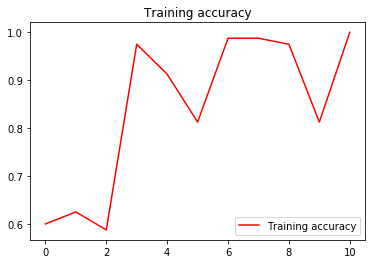

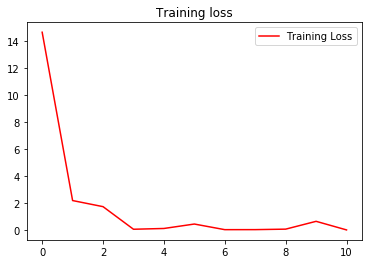

In [6]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()